<a href="https://colab.research.google.com/github/pebehv/Deep-Learning/blob/master/Notebooks/Chap10/10_4_Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.4: Downsampling and Upsampling**

This notebook investigates the upsampling and downsampling methods discussed in section 10.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [2]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [5]:
import numpy as np

def subsample(x_in):
    """
    Realiza una operación de submuestreo (Max Pooling) en un array 2D.

    Reduce la dimensión del array a la mitad (aproximadamente, redondeando hacia arriba)
    tomando el valor máximo de ventanas de 2x2 con un stride de 2.

    Args:
        x_in (np.array): Array NumPy 2D de entrada.

    Returns:
        np.array: Array NumPy 2D submuestreado.
    """

    # Calcular las dimensiones de salida redondeando hacia arriba
    # Esto asegura que incluso si la dimensión de entrada es impar,
    # habrá un lugar para el último elemento.
    output_rows = int(np.ceil(x_in.shape[0] / 2))
    output_cols = int(np.ceil(x_in.shape[1] / 2))

    # Inicializar el array de salida con ceros
    x_out = np.zeros((output_rows, output_cols), dtype=x_in.dtype)

    # Definir el tamaño de la ventana (kernel) y el stride para el pooling
    pool_size = 2
    stride = 2

    # Iterar sobre las dimensiones del array de salida
    for r_out in range(output_rows):
        for c_out in range(output_cols):
            # Calcular las coordenadas de inicio de la ventana en el array de entrada
            r_start = r_out * stride
            c_start = c_out * stride

            # Calcular las coordenadas de fin de la ventana en el array de entrada
            # Usamos min() para manejar los bordes cuando la dimensión de entrada es impar
            r_end = min(r_start + pool_size, x_in.shape[0])
            c_end = min(c_start + pool_size, x_in.shape[1])

            # Extraer la ventana (patch) del array de entrada
            # Si las dimensiones son impares, el patch puede ser más pequeño que 2x2
            current_patch = x_in[r_start:r_end, c_start:c_end]

            # Tomar el valor máximo de la ventana y asignarlo a la salida
            # Si el patch está vacío (lo cual no debería ocurrir con la lógica de ceil y min),
            # np.max() podría dar un error, pero con esta implementación es seguro.
            x_out[r_out, c_out] = np.max(current_patch)

    return x_out

In [6]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[6 8]
 [8 4]]


Let's try that on an image to get a feel for how it works:

In [7]:
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png

--2025-07-30 00:36:06--  https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60792 (59K) [image/png]
Saving to: ‘test_image.png’

test_image.png      100%[===================>]  59.37K  --.-KB/s    in 0.008s  

2025-07-30 00:36:07 (6.97 MB/s) - ‘test_image.png’ saved [60792/60792]



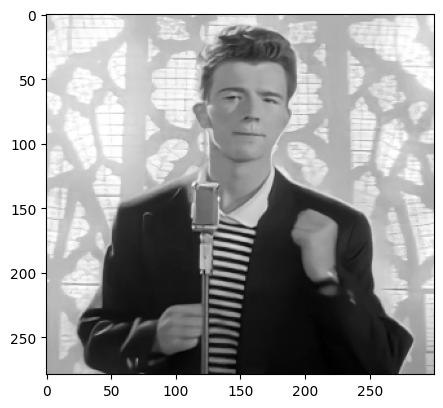

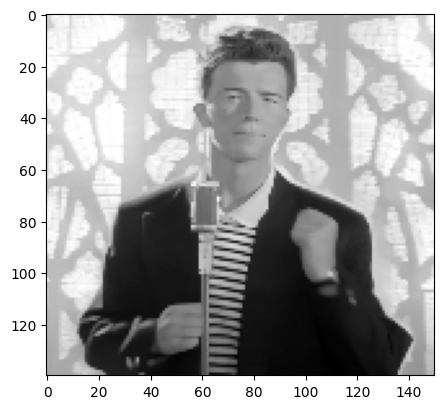

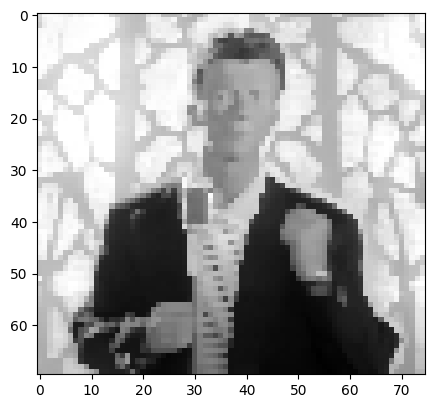

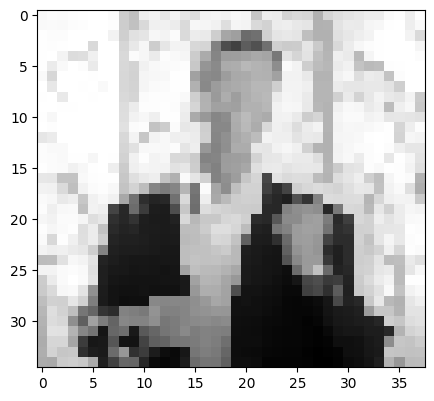

In [8]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [16]:
# Now let's try max-pooling
def maxpool(x_in):
  # Initialize the output array with the correct dimensions, using np.ceil
  # to handle odd-sized inputs correctly.
  output_rows = int(np.ceil(x_in.shape[0]/2))
  output_cols = int(np.ceil(x_in.shape[1]/2))
  x_out = np.zeros((output_rows, output_cols))

  # Define the pooling window size and stride
  pool_size = 2
  stride = 2

  # Iterate over the output array dimensions
  for r_out in range(output_rows):
      for c_out in range(output_cols):
          # Calculate the window start and end coordinates in the input array
          r_start = r_out * stride
          c_start = c_out * stride
          r_end = min(r_start + pool_size, x_in.shape[0])
          c_end = min(c_start + pool_size, x_in.shape[1])

          # Extract the current patch from the input array
          current_patch = x_in[r_start:r_end, c_start:c_end]

          # Find the maximum value in the patch and assign it to the output
          x_out[r_out, c_out] = np.max(current_patch)

  return x_out

In [17]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6. 8.]
 [8. 4.]]


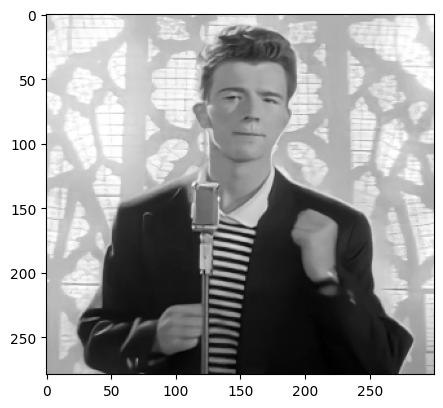

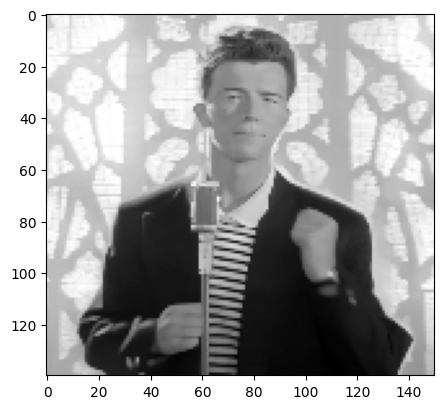

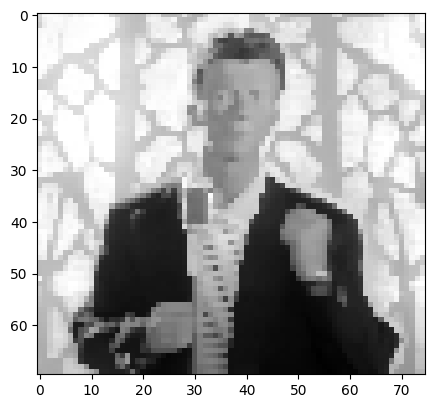

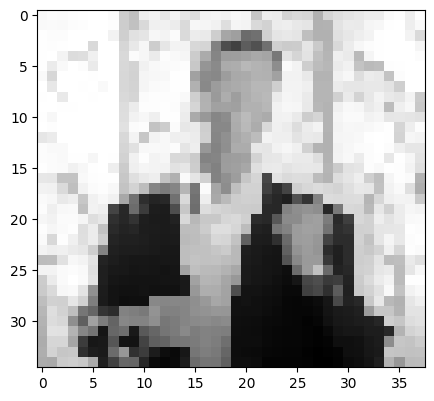

In [18]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [ ]:
# Finally, let's try mean pooling
def meanpool(x_in):
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  # TODO -- write the meanpool routine
  # Replace this line
  x_out = x_out

  return x_out

In [ ]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

In [ ]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [ ]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

In [ ]:
# Let's first use the duplication method
def duplicate(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the duplication routine
  # Replace this line
  x_out = x_out

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

In [ ]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [ ]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
def max_unpool(x_in, x_high_res):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the subsampling routine
  # Replace this line
  x_out = x_out

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

In [ ]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [ ]:
def bilinear(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  x_in_pad = np.zeros((x_in.shape[0]+1, x_in.shape[1]+1))
  x_in_pad[0:x_in.shape[0],0:x_in.shape[1]] = x_in
  # TODO -- write the duplication routine
  # Replace this line
  x_out = x_out

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

In [ ]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()